In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import cbsodata
import seaborn as sns

In [2]:
# Set the font globally
matplotlib.rcParams['font.family'] = 'Roboto'  # You can replace 'Roboto' with any installed font

In [3]:
# Fetch the specific dataset using its ID
data = pd.DataFrame(cbsodata.get_data('80072NED'))

In [4]:
# Display the first few rows of the dataset
print(data.head())

   ID           BedrijfskenmerkenSBI2008          Perioden  \
0   0  A-U Alle economische activiteiten  1996 1e kwartaal   
1   1  A-U Alle economische activiteiten  1996 2e kwartaal   
2   2  A-U Alle economische activiteiten  1996 3e kwartaal   
3   3  A-U Alle economische activiteiten  1996 4e kwartaal   
4   4  A-U Alle economische activiteiten              1996   

   Ziekteverzuimpercentage_1  
0                        5.5  
1                        4.6  
2                        4.0  
3                        4.7  
4                        4.7  


In [5]:
# Extract year and quarter from the 'Perioden' column
data['Year'] = data['Perioden'].str.extract(r'(\d{4})').astype(float)
data['Quarter'] = data['Perioden'].str.extract(r'(\d)e kwartaal').astype(float)


In [6]:
# Drop rows where Year or Quarter is NaN (e.g., full year periods)
data = data.dropna(subset=['Year', 'Quarter'])

In [7]:
# Convert Year and Quarter to integers
data['Year'] = data['Year'].astype(int)
data['Quarter'] = data['Quarter'].astype(int)

In [8]:
# Filter data to include only years from 2016 to 2023
data = data[(data['Year'] >= 2016) & (data['Year'] <= 2023)]

In [9]:
# Aggregate the data to handle duplicates
agg_data = data.groupby(['Quarter', 'Year']).agg({'Ziekteverzuimpercentage_1': 'mean'}).reset_index()

In [10]:
# Pivot the table to get years as columns and quarters as rows
pivot_data = agg_data.pivot(index='Quarter', values='Ziekteverzuimpercentage_1', columns='Year')

In [11]:
# Sort columns in descending order
pivot_data = pivot_data[sorted(pivot_data.columns, reverse=True)]

In [12]:
# Set a pastel color palette
sns.set_palette("colorblind")

In [13]:
# Get the current color palette
colors = sns.color_palette("colorblind", n_colors=len(pivot_data.columns))

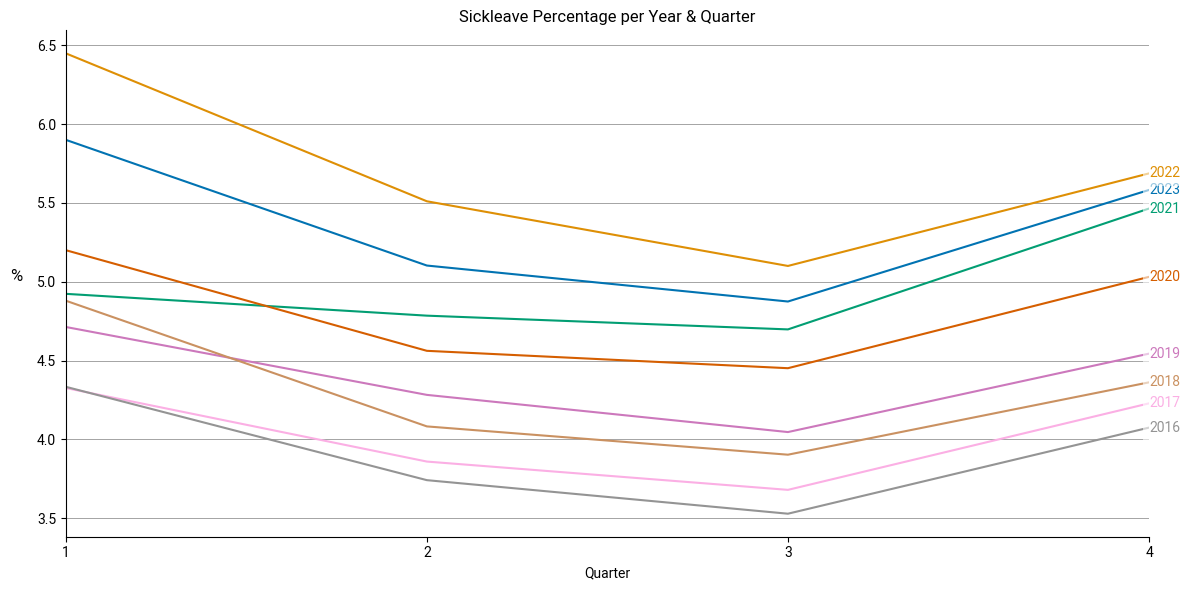

In [14]:
# Plotting the line chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_data.plot(kind='line', ax=ax)

# Set titles and labels with a specific font
plt.title('Sickleave Percentage per Year & Quarter', fontdict={'fontsize': 12, 'fontweight': 'normal'})
plt.xlabel('Quarter', fontdict={'fontsize': 10, 'fontweight': 'normal'})

# Set y-axis label, move it to the top, and rotate it
ax.set_ylabel('%', fontdict={'fontsize': 12, 'fontweight': 'normal'}, rotation=0, labelpad=15) 

# Ensure x-axis labels are whole numbers
ax.set_xticks(pivot_data.index)
ax.set_xticklabels(pivot_data.index)

# Adjust axis limits to remove white margins
ax.set_xlim(pivot_data.index.min(), pivot_data.index.max())

# Add year labels directly behind their corresponding lines, with matching colors
for color, year in zip(colors, pivot_data.columns):
    ax.text(
        x=pivot_data.index.max(),  # Position at the rightmost point of the line
        y=pivot_data[year].iloc[-1],  # Position at the last value of the line
        s=str(year),  # The year label
        va='center',  # Vertically align the text
        ha='left',  # Horizontally align the text
        fontsize=10,  # Font size for the labels
        color=color,  # Set the text color to match the line
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')  # Optional background box
    )

# Remove the legend
ax.legend().remove()

# Remove the upper and right spines (lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add light grey vertical grid lines
ax.grid(axis='y', color='grey', linestyle='-', linewidth=0.5)

# Remove remaining white margins
plt.tight_layout()

# Save the plot to a file before showing it
plt.savefig("line_plot.png", bbox_inches='tight')
plt.show()